In [25]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

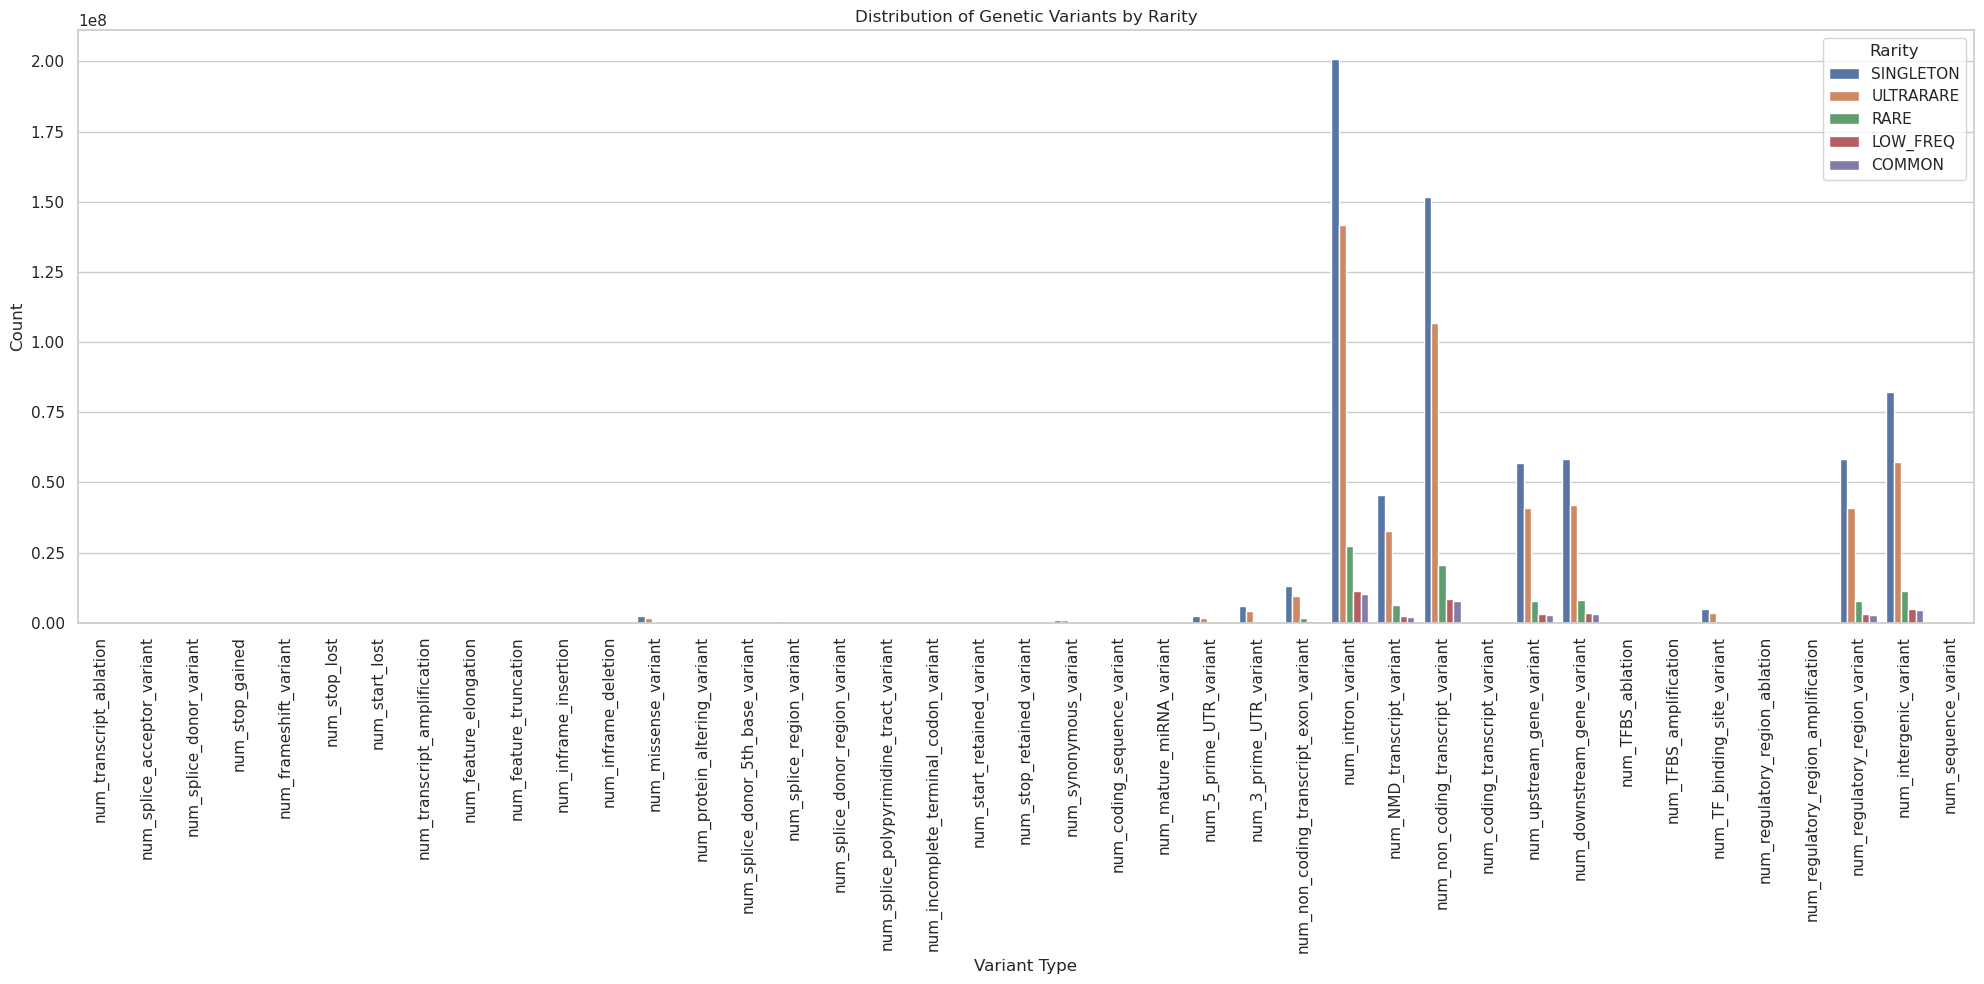

In [14]:
# Load JSON data from a file
file_path = './OUT.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Reset index to turn the rarity codes into a column
df = df.reset_index().rename(columns={'index': 'Rarity'})

# Melt the DataFrame to long format
df_long = df.melt(id_vars='Rarity', var_name='Variant', value_name='Count')

df_long['Count'] = df_long['Count'].fillna(0)

threshold = 1000
filtered_df = df_long.groupby('Variant').filter(lambda x: x['Count'].max() > threshold)
filtered_df=df_long

variant_labels = filtered_df['Variant'].unique()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
barplot = sns.barplot(x="Variant", y="Count", hue="Rarity", data=filtered_df,hue_order=["SINGLETON","ULTRARARE","RARE","LOW_FREQ","COMMON"])

plt.title("Distribution of Genetic Variants by Rarity")
plt.xlabel("Variant Type")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Adjust rotation as needed
plt.legend(title='Rarity')
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

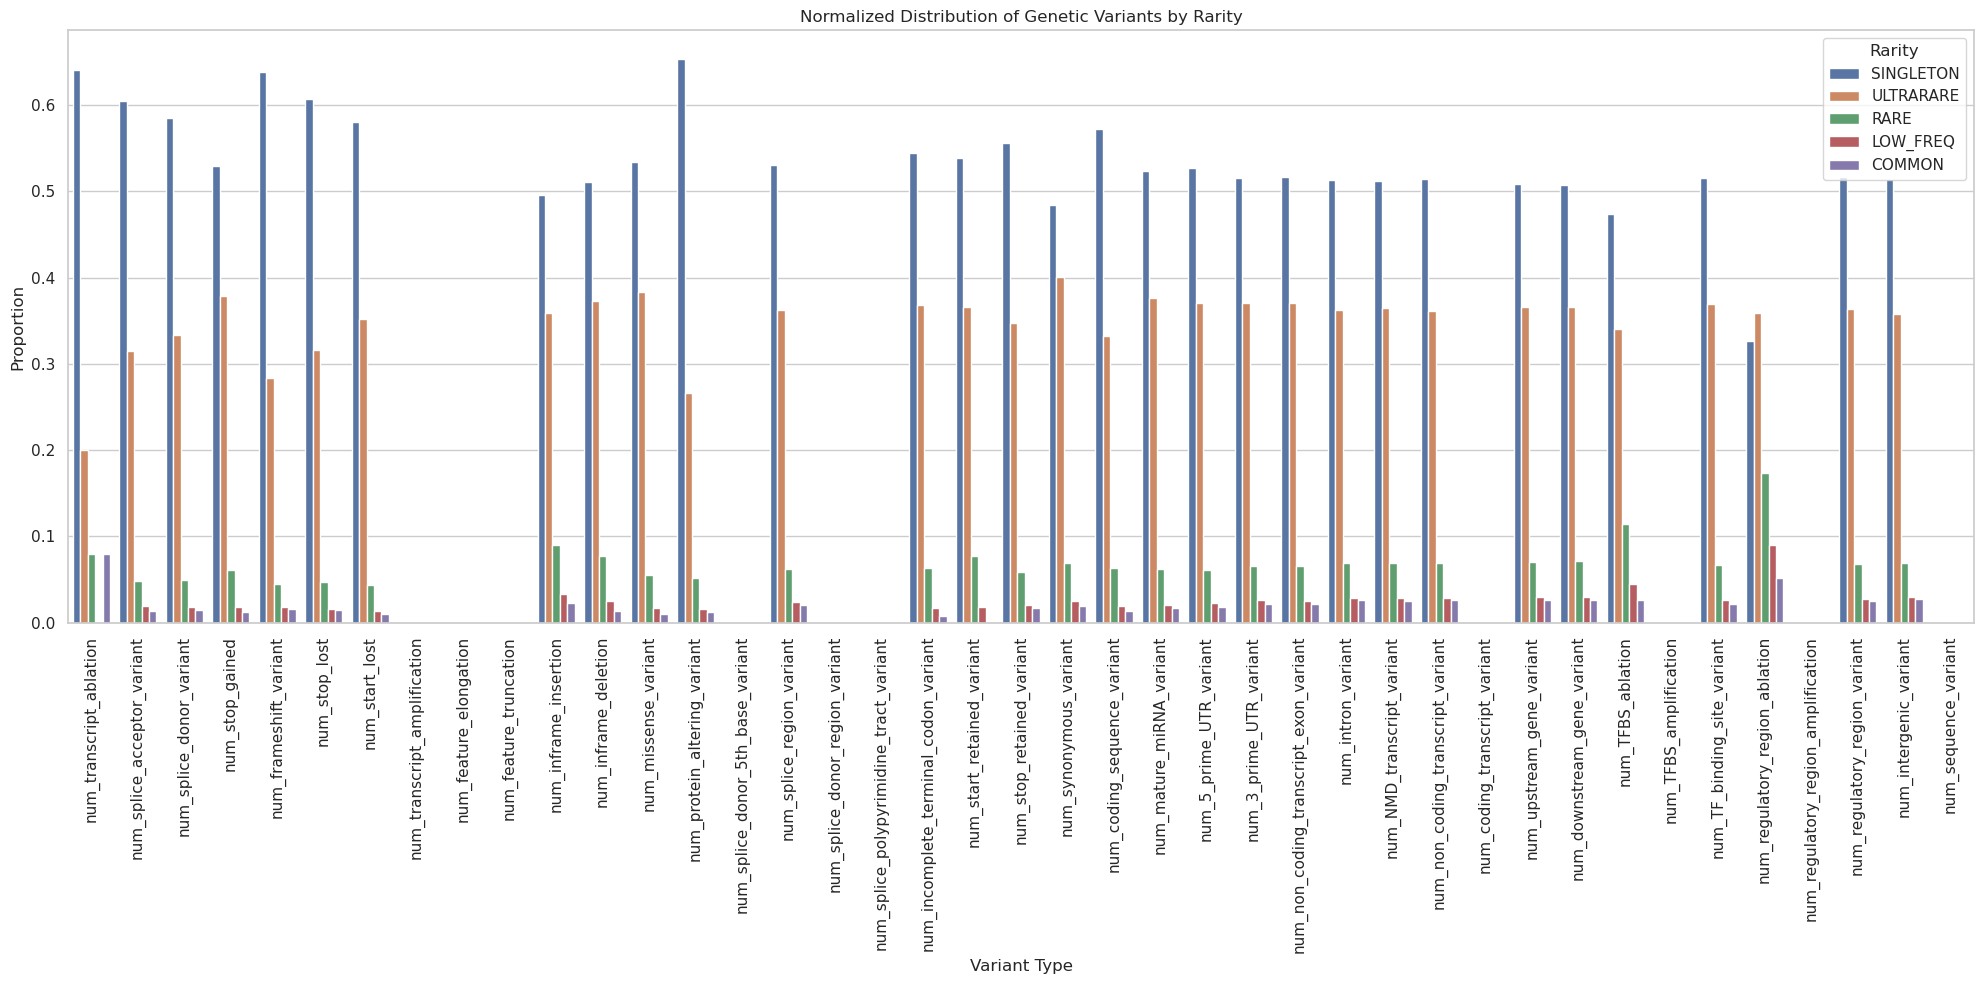

In [22]:
proportion_df = filtered_df.copy()
proportion_df['Proportion'] = proportion_df.groupby('Variant')['Count'].transform(lambda x: x / x.sum())

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
barplot = sns.barplot(x="Variant", y="Proportion", hue="Rarity", data=proportion_df,hue_order=["SINGLETON","ULTRARARE","RARE","LOW_FREQ","COMMON"])

plt.title("Normalized Distribution of Genetic Variants by Rarity")
plt.xlabel("Variant Type")
plt.ylabel("Proportion")
plt.xticks(rotation=90)  # Adjust rotation as needed
plt.legend(title='Rarity')
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

In [29]:
df_ratio=df.copy().fillna(0).transpose()

df_ratio=df_ratio.set_axis(df_ratio.loc["Rarity",:],axis=1)

df_ratio=df_ratio.drop("Rarity",axis=0)



df_ratio=df_ratio[df_ratio.max(axis=1)>=threshold]

df_ratio["ratio"]=(df_ratio["SINGLETON"]+df_ratio["ULTRARARE"])/(df_ratio["COMMON"]+df_ratio["LOW_FREQ"]+df_ratio["RARE"])
df_ratio=df_ratio.rename_axis("Variant")
df_ratio.sort_values("ratio")

Rarity,SINGLETON,RARE,COMMON,ULTRARARE,LOW_FREQ,ratio
Variant,,,,,,
num_TFBS_ablation,19533,4734,1090,14071,1849,4.946233
num_intergenic_variant,82265182,11151911,4436163,57234949,4759268,4.974810
num_downstream_gene_variant,58372630,8161829,3020881,42057813,3388295,5.055083
num_intron_variant,200992484,27269678,10277193,141793694,11436442,5.059791
num_non_coding_transcript_variant,151626001,20522477,7742319,106694454,8601173,5.060252
num_upstream_gene_variant,57087042,7903044,2921914,40979940,3285344,5.068782
num_NMD_transcript_variant,45585218,6193744,2213989,32535030,2558343,5.140977
num_regulatory_region_variant,58286005,7644086,2791832,41035285,3150102,5.152819
num_inframe_insertion,19502,3551,887,14112,1293,5.243984


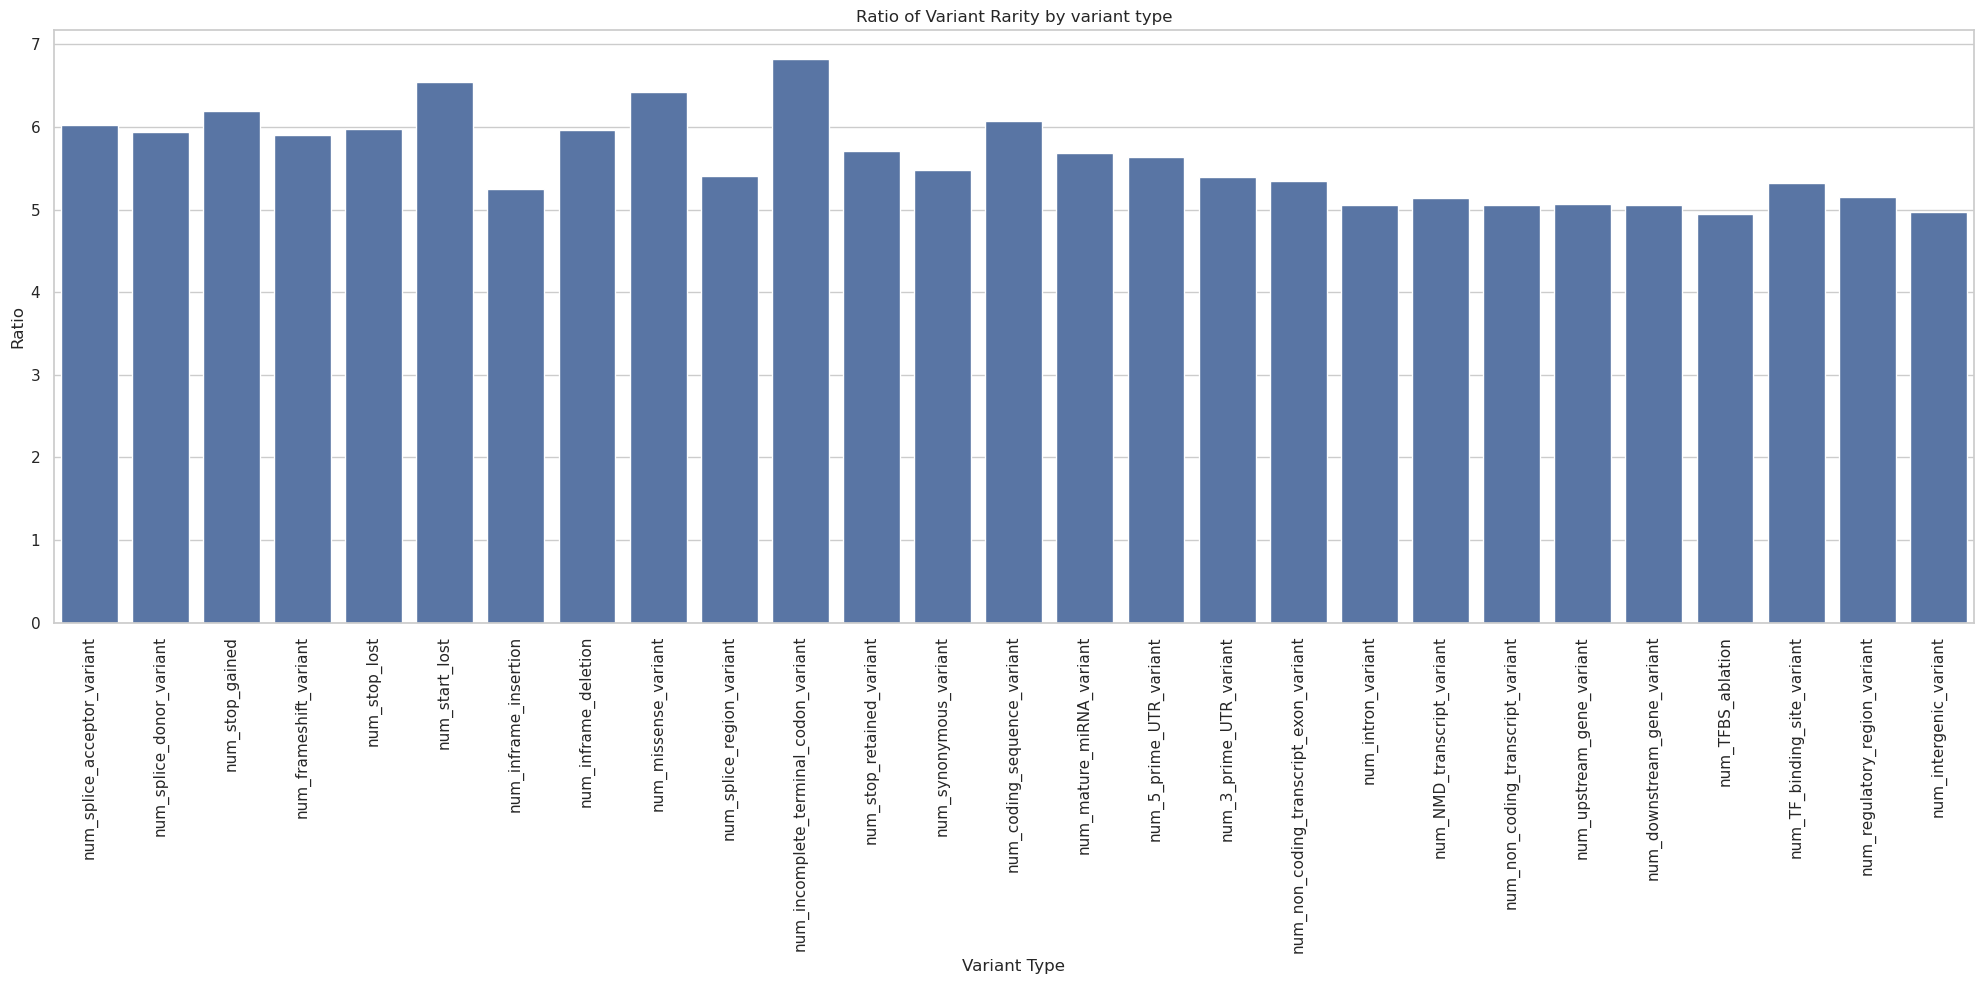

In [30]:
plt.figure(figsize=(20, 10))
barplot = sns.barplot(x="Variant", y="ratio", data=df_ratio)

plt.title("Ratio of Variant Rarity by variant type")
plt.xlabel("Variant Type")
plt.ylabel("Ratio")
plt.xticks(rotation=90)  # Adjust rotation as needed

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()